In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader.data as pdr

In [2]:
#!pip install yfinance
import yfinance as yf

In [29]:
stock = input('Enter The Stock Ticker Symbol: ')
stock = stock.upper()

Enter The Stock Ticker Symbol: tatamotors.ns


In [30]:
start_year = 2018
start_month = 1
start_day = 1
start = dt.datetime(start_year, start_month, start_day)
start

datetime.datetime(2018, 1, 1, 0, 0)

In [31]:
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

In [32]:
df = yf.download(tickers=stock, interval='1d')
df2 = pdr.DataReader(stock, 'yahoo', start)

[*********************100%***********************]  1 of 1 completed


In [33]:
df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,436.399994,422.250000,430.950012,424.450012,6807536,424.450012
2018-01-02,440.850006,422.000000,428.850006,439.299988,15331261,439.299988
2018-01-03,441.399994,431.950012,440.399994,433.899994,9794953,433.899994
2018-01-04,433.299988,425.750000,430.000000,429.950012,8395377,429.950012
2018-01-05,436.350006,429.799988,431.250000,431.600006,7021611,431.600006


In [34]:
df2.shape

(1060, 6)

In [35]:
new_data = pd.DataFrame({'Close':df2['Close']})

In [36]:
new_data.head()

,Close
Date,
2018-01-01,424.450012
2018-01-02,439.299988
2018-01-03,433.899994
2018-01-04,429.950012
2018-01-05,431.600006


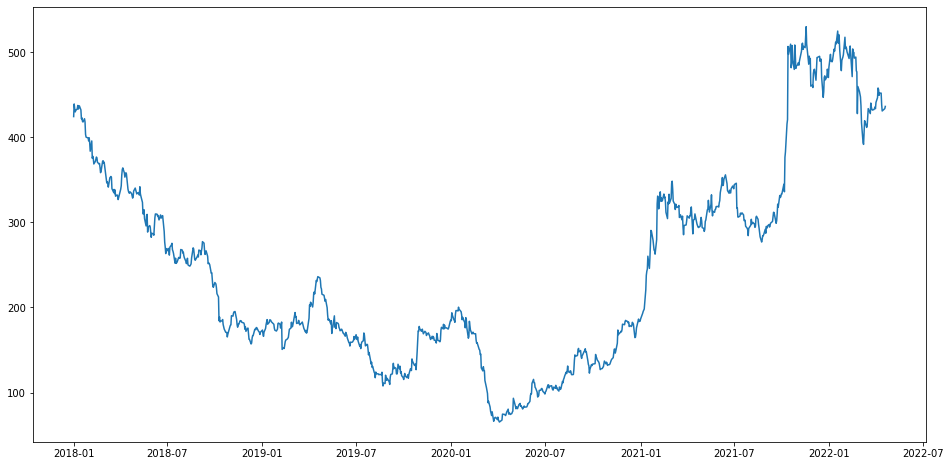

In [37]:
plt.figure(figsize=(16,8))
plt.plot(new_data["Close"],label='Close Price history')

In [38]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_data.values

In [39]:
train_data=final_dataset[0:int(df2.shape[0]*0.8),:]
valid_data=final_dataset[int(df2.shape[0]*0.8):,:]

In [40]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [41]:
scaled_data

array([[0.77261481],
       [0.80456054],
       [0.7929439 ],
       ...,
       [0.78681288],
       [0.79272877],
       [0.79832198]])

In [42]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [43]:
train_data

array([[424.45001221],
       [439.29998779],
       [433.8999939 ],
       [429.95001221],
       [431.6000061 ],
       [433.54998779],
       [437.54998779],
       [433.29998779],
       [434.75      ],
       [437.1000061 ],
       [432.3500061 ],
       [421.8999939 ],
       [422.95001221],
       [418.95001221],
       [418.04998779],
       [421.8999939 ],
       [418.        ],
       [403.6000061 ],
       [400.29998779],
       [399.25      ],
       [395.8500061 ],
       [399.5       ],
       [393.6499939 ],
       [383.75      ],
       [395.79998779],
       [375.45001221],
       [377.79998779],
       [374.8500061 ],
       [368.75      ],
       [371.79998779],
       [376.8500061 ],
       [375.79998779],
       [370.75      ],
       [368.75      ],
       [369.29998779],
       [364.45001221],
       [358.5       ],
       [360.20001221],
       [372.04998779],
       [372.54998779],
       [369.8999939 ],
       [370.75      ],
       [352.04998779],
       [346

In [44]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

In [45]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [46]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [47]:
inputs_data=new_data[len(new_data)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [48]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

788/788 - 25s - loss: 0.0029 - 25s/epoch - 32ms/step


In [49]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [50]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)

In [51]:
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [52]:
lstm_model.save("saved_model.h5")

In [53]:
train_data=new_data[:int(df2.shape[0]*0.8)]
valid_data=new_data[int(df2.shape[0]*0.8):]
valid_data['Predictions']=predicted_closing_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


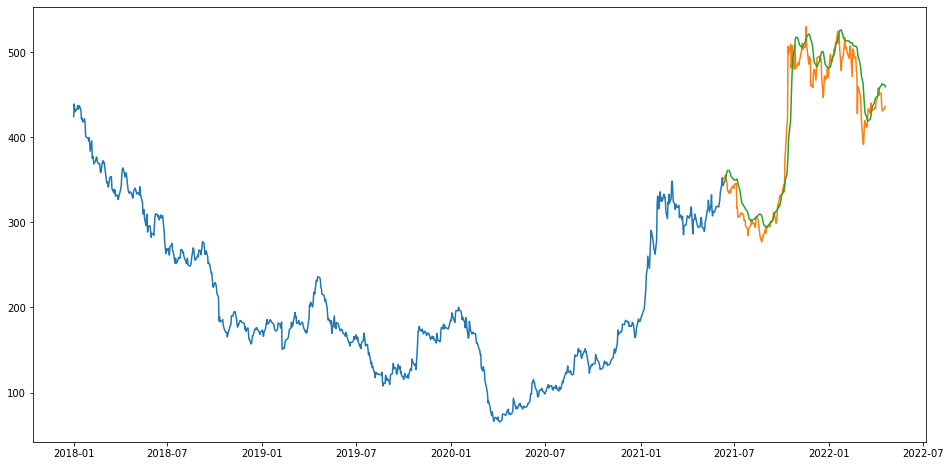

In [54]:
plt.figure(figsize=(16,8))
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])